In [35]:
# load up MNIST datasets
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f = gzip.open('datasets/MNIST/train-images-idx3-ubyte.gz', 'r')
img_size = 28                                                # a single image is in shape of 28 * 28
num_sample = 60000

f.read(16)                                                   # read the first 16 bit of data(no information)
buf = f.read(img_size * img_size * num_sample)                  # read the rest true image data
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32) # frombuffer: read bytes data in specified 'dtype', 'length', and 'location'.
data = data.reshape(num_sample, img_size, img_size, 1)

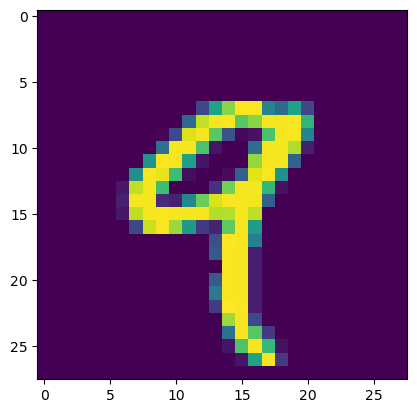

(60000, 28, 28, 1)
(60000,)


In [36]:
image = np.asarray(data[4]).squeeze()
plt.imshow(image)
plt.show()
print(data.shape)

f = gzip.open('datasets/MNIST/train-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(-1)
labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
labels.reshape(labels.shape[0], 1, 1)
print(labels.shape)

In [37]:
# load data from raw mnist
def load_mnist(path, bit_length, img_size, num_sample):
    import gzip
    f = gzip.open(path, 'r')
    if bit_length == 16:
        f.read(bit_length)
        buffer = f.read(img_size * img_size * num_sample)
        data = np.frombuffer(buffer, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_sample, img_size, img_size, 1)
        return data
    else:
        f.read(bit_length)
        buffer = f.read()
        data = np.frombuffer(buffer, dtype=np.uint8).astype(np.int64)
        return data
    
train_img = load_mnist('datasets/MNIST/train-images-idx3-ubyte.gz', 16, 28, 60000)
train_label = load_mnist('datasets/MNIST/train-labels-idx1-ubyte.gz', 8, 0, 60000)
# test_img = load_mnist('datasets/MNIST/train-images-idx3-ubyte.gz', 16, 28, 60000)
# test_label = load_mnist('datasets/MNIST/train-labels-idx1-ubyte.gz', 8, 0, 60000)

print(train_img.shape, train_img.dtype)
print(train_label.shape, train_label.dtype)

(60000, 28, 28, 1) float32
(60000,) int64


(1000, 784)
(1000,)


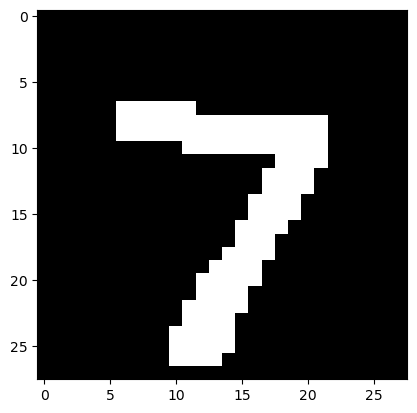

In [38]:
import os

# load data from txt file
m_x = np.loadtxt('datasets/mnist_x.txt', delimiter=' ')
m_y = np.loadtxt('datasets/mnist_y.txt')

# visualize first image
data = np.reshape(np.array(m_x[0], dtype=int), [28, 28])
plt.figure()
plt.imshow(data, cmap='gray')
print(m_x.shape)
print(m_y.shape)

(1000, 28, 28, 1) [[[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [ 13.]
  [180.]
  [254.]
  [255.]
  [179.]
  [ 12.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [153.]
  [253.]
  [253.]
  [253.]
  [253.]
  [ 30.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [ 

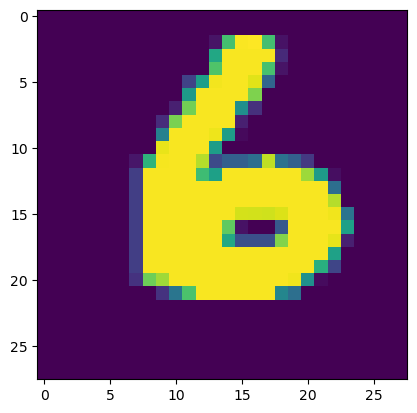

In [39]:
# split into train and test set
ratio = 0.8
train_number = int(len(train_img) * ratio)

# randomly splitting
np.random.seed(0)
idx = np.random.permutation(np.arange(len(train_img)))   # rearrangement
X = train_img[idx]
y = train_label[idx]

# X_train, y_train = X[:train_number], y[:train_number]
# X_test, y_test = X[train_number:], y[train_number:]
X_train, y_train = X[:1000], y[:1000]
X_test, y_test = X[1000:2000], y[1000:2000]

print(X_train.shape, X_train[1])
print(y_train.shape, y_train[1])
plt.imshow(X_train[1])
plt.show()

In [40]:
# Euclidean distance for KNN
def distance(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

# KNN algorithms
# 1. compute distance list
# 2. sort and select k nearest neighbors
# 3. calculate k neighbors' labels
class KNN(object):
    def __init__(self, k, label_num) -> None:
        self.k = k
        self.label_num = label_num  # unique labels

    # here is actually not fitting anything but offering a reference for prediction 
    # like when predicting a target test data, we search for all its nearest neighbors in the 'train' data
    # and their labels. And calculate the maximum of the neighbor labels. This is the target 
    # test data label
    def fit(self, X, y):
        self.X = X
        self.y = y

    def get_knn_indices(self, x):
        # get all distance between x and rest of the X
        dis = list(map(lambda a: distance(a, x), self.X))
        # sort the from short to long
        knn_indices = np.argsort(dis)
        # get first k data
        return knn_indices[:self.k]
    
    def get_labels(self, x):
        # get nearest neighbor data
        knn_indices = self.get_knn_indices(x)
        # calculate all the labels of those data
        knn_labels = np.zeros(shape=[self.label_num])   # initialize a label structure with zero
        for index in knn_indices:
            label = int(self.y[index])   # get the current label of current index's data
            knn_labels[label] += 1
        return np.argmax(knn_labels)     # return the most existed labels
    
    def predict(self, X):
        predicted_y = np.zeros(shape=[len(X)], dtype=int)
        for i, x in enumerate(X):
            predicted_y[i] = self.get_labels(x)
        return predicted_y

In [41]:
# fit and test our datasets
for k in range(10):
    knn = KNN(k, label_num=10)
    knn.fit(X_train, y_train)
    predicted_y = knn.predict(X_test)
    accuracy = np.mean(predicted_y == y_test)
    print(f'K = {k}, accruracy = {accuracy * 100:.1f}%')

K = 0, accruracy = 11.1%
K = 1, accruracy = 86.1%
K = 2, accruracy = 84.7%
K = 3, accruracy = 86.3%
K = 4, accruracy = 86.0%
K = 5, accruracy = 84.4%
K = 6, accruracy = 85.2%
K = 7, accruracy = 85.3%
K = 8, accruracy = 84.3%
K = 9, accruracy = 84.0%


(200, 2)


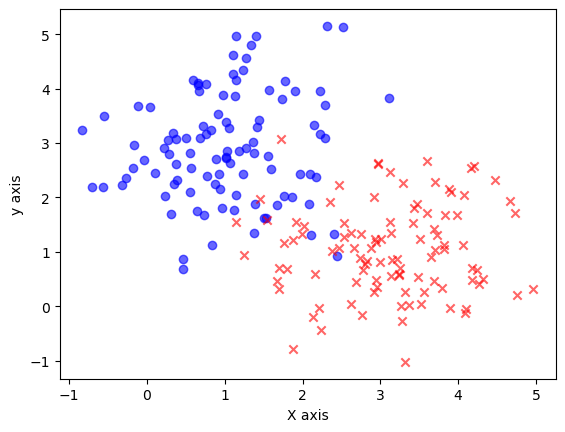

In [42]:
# KNN with sklearn
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# load gauss datasets
data = np.loadtxt('datasets/gauss.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]
print(X.shape)

# visualize datasets
plt.scatter(X[y==0, 0], 
            X[y==0, 1], 
            c='blue', 
            marker='o', 
            alpha=0.6)
plt.scatter(X[y==1, 0], 
            X[y==1, 1], 
            c='red', 
            marker='x', 
            alpha=0.6)
plt.xlabel('X axis')
plt.ylabel('y axis')
plt.show()

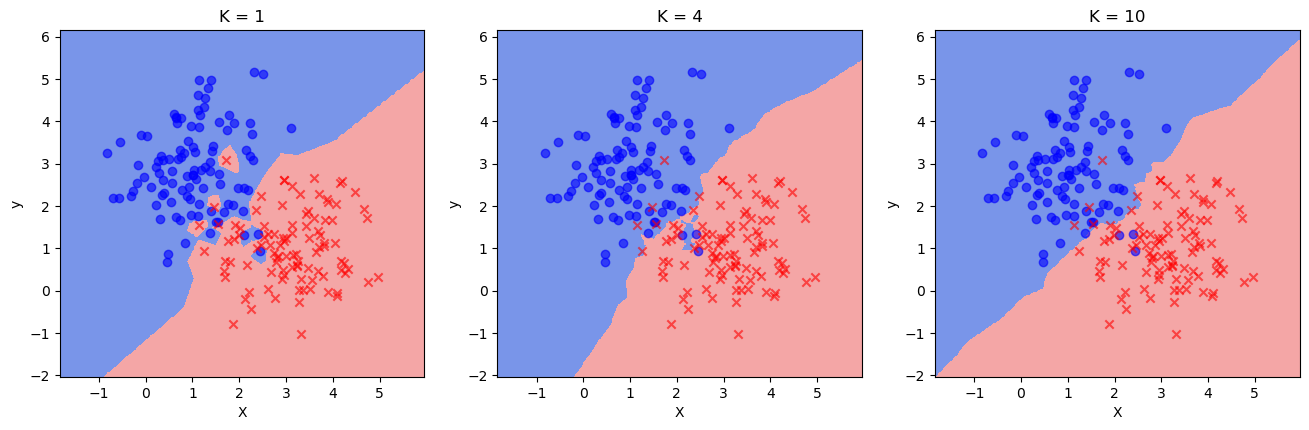

In [43]:
# test dataset: grid mesh data with step of 0.02
step = 0.02                                                                         # set up grid unit step
x_min, x_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1                             # set up grid x axis
y_min, y_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1                             # set up grid y axis
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))  # get grid
grid_data = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)          # concatenate two axis

fig = plt.figure(figsize=(16, 4.5))
n_k = [1, 4, 10]
cmap = ListedColormap(['royalblue', 'lightcoral'])

for i, k in enumerate(n_k):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=4)
    knn.fit(X, y)
    z = knn.predict(grid_data)

    ax = fig.add_subplot(1, 3, i + 1)
    # visualize area with 'pcolormesh'
    ax.pcolormesh(xx, 
                  yy, 
                  z.reshape(xx.shape), 
                  cmap=cmap, 
                  alpha=0.7)
    ax.scatter(X[y==0, 0], 
               X[y==0, 1], 
               c='blue', 
               marker='o', 
               alpha=0.6)
    ax.scatter(X[y==1, 0], 
               X[y==1, 1], 
               c='red', 
               marker='x', 
               alpha=0.6)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title(f'K = {k}')

plt.show()